In [41]:
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE  ,  Isomap , MDS
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# REDUCCION DE LA DIMENSIONALIDAD

In [ ]:
df=pd.read_csv("features_vgg16.csv",index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0.725486,0.0,3.347053,0.000000,2.567833,0.610171,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.486512,0.00000,0.0,0.312587,0.632104,0.216850,2.252562,4.117124,1.257802,1.330312,0.0,0.0,0.0,0.000000,2.164772,1.049620,0.0,0.000000,0.0,0.00000,0.883103,0.000000,0.221783,0.000000,0.000000,2.776000,...,0.862513,0.000000,0.0,1.711282,0.975003,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.504483,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.567955,0.0,0.000000,0.0,0.000000,0.0,0.0,2.973807,3.850669,0.0,0.000000,airplane
1,0.000000,0.0,2.890268,0.000000,1.454425,2.634050,0.0,3.562424,0.0,3.116060,0.0,0.000000,0.0,1.527026,0.000000,0.00000,0.0,1.922368,0.000000,0.000000,1.791084,0.000000,0.000000,5.216634,0.0,0.0,0.0,3.152304,7.071207,0.798983,0.0,0.000000,0.0,0.00000,0.000000,2.382935,0.000000,0.000000,0.309733,1.915720,...,2.467520,1.166760,0.0,0.690094,0.000000,0.0,0.000000,1.430626,0.0,1.494537,0.657673,0.000000,0.0,1.279787,0.717633,0.0,0.0,0.000000,0.0,0.0,1.390051,0.000000,0.000000,0.359657,0.000000,0.0,0.080583,0.0,1.081396,0.0,0.654914,0.0,0.622745,0.0,0.0,2.239553,3.966587,0.0,0.499471,airplane
2,0.000000,0.0,2.146848,0.005841,0.000000,0.107351,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.643637,1.204755,0.00000,0.0,0.712659,0.000000,0.000000,5.241439,1.725490,0.675614,1.216717,0.0,0.0,0.0,0.272951,3.447968,0.000000,0.0,2.281647,0.0,0.50826,0.000000,0.229404,2.795068,0.861392,0.000000,0.327327,...,3.814644,0.000000,0.0,1.064901,0.000000,0.0,0.000000,2.496242,0.0,0.000000,0.201343,1.064709,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.839707,0.000000,0.000000,0.000000,0.063471,0.0,0.000000,0.0,2.724942,0.0,0.000000,0.0,0.731043,0.0,0.0,0.000000,1.482779,0.0,0.000000,airplane
3,0.000000,0.0,2.301114,0.000000,2.103612,0.000000,0.0,0.000000,0.0,0.349480,0.0,0.000000,0.0,0.000000,0.368001,0.00000,0.0,1.621378,0.000000,0.000000,5.156120,4.556432,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.191697,2.800266,0.0,0.000000,0.0,0.80345,1.060388,0.000000,5.387923,0.000000,0.000000,6.700355,...,0.000000,1.421755,0.0,3.757160,0.000000,0.0,0.221142,0.000000,0.0,0.000000,0.752705,0.000000,0.0,6.208139,0.000000,0.0,0.0,0.474682,0.0,0.0,1.958129,0.000000,0.292125,0.000000,0.000000,0.0,0.000000,0.0,2.972413,0.0,2.516614,0.0,0.000000,0.0,0.0,4.720914,4.792036,0.0,0.000000,airplane
4,0.000000,0.0,1.126047,0.796374,0.000000,0.000000,0.0,0.000000,0.0,1.201844,0.0,1.979913,0.0,0.000000,0.000000,0.54713,0.0,0.344196,0.000000,0.290451,1.673017,1.733559,1.408249,0.000000,0.0,0.0,0.0,0.496381,4.110686,0.000000,0.0,0.000000,0.0,0.66003,0.000000,0.000000,0.000000,0.000000,0.000000,2.872688,...,1.577975,2.275501,0.0,1.450007,0.748876,0.0,0.000000,0.307452,0.0,0.000000,1.948106,0.000000,0.0,0.191937,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.411887,1.867079,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.273120,0.0,2.927129,0.0,0.0,3.065292,1.295985,0.0,0.000000,airplane


In [7]:
df.shape

(6899, 4097)

## Escalado

In [16]:
scaler=StandardScaler()

values_scaled=scaler.fit_transform(df.drop(columns="label").values)
df_scaled = pd.DataFrame(data=values_scaled,columns=df.drop(columns="label").columns)
df_scaled["label"] = df["label"]
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,1.016397,-0.262541,2.236190,-0.571305,1.672327,0.458860,-0.503348,-0.327600,-0.449117,-0.474459,-0.447778,-0.294597,-0.454984,-0.449286,0.230209,-0.393708,-0.417857,-0.428038,0.067494,-0.165875,1.322126,4.290717,0.562739,0.827646,-0.379294,-0.516321,-0.550422,-0.478127,1.223569,0.965409,-0.406766,-0.474627,-0.197472,-0.470242,0.487798,-0.458926,-0.143991,-0.445544,-0.555842,2.520579,...,0.034742,-0.493816,0.0,0.930957,0.459242,-0.300555,-0.349690,-0.423795,-0.424589,-0.447228,-0.377718,-0.469048,-0.312115,0.314859,-0.533512,-0.357259,-0.409799,-0.359539,-0.341587,-0.229922,-0.481550,-0.397492,-0.296827,-0.563861,-0.460561,-0.276197,-0.584219,-0.371457,0.116282,-0.2699,-0.429833,-0.308191,-0.426166,-0.662633,-0.466252,1.613093,1.608611,-0.398600,-0.390567,airplane
1,-0.302714,-0.262541,1.864225,-0.571305,0.716576,3.208829,-0.503348,3.753220,-0.449117,1.799347,-0.447778,-0.294597,-0.454984,1.332572,-0.310932,-0.393708,-0.417857,0.497157,-0.446238,-0.388714,0.952200,-0.409883,-0.494143,4.492096,-0.379294,-0.516321,-0.550422,1.495865,4.919174,0.648976,-0.406766,-0.474627,-0.197472,-0.470242,-0.382583,1.474850,-0.390286,-0.445544,-0.334561,1.604414,...,1.043204,0.519268,0.0,0.147577,-0.431878,-0.300555,-0.349690,0.906467,-0.424589,0.659344,0.444394,-0.469048,-0.312115,0.169965,0.021010,-0.357259,-0.409799,-0.359539,-0.341587,-0.229922,0.505594,-0.397492,-0.296827,-0.331542,-0.460561,-0.276197,-0.523913,-0.371457,0.641902,-0.2699,0.235112,-0.308191,0.270951,-0.662633,-0.466252,1.062684,1.675845,-0.398600,0.297664,airplane
2,-0.302714,-0.262541,1.258849,-0.567935,-0.531905,-0.224352,-0.503348,-0.327600,-0.449117,-0.474459,-0.447778,-0.294597,-0.454984,0.301763,1.029100,-0.393708,-0.417857,-0.198103,-0.446238,-0.388714,3.718046,1.560142,0.073549,0.720536,-0.379294,-0.516321,-0.550422,-0.307203,2.190093,-0.359756,-0.406766,0.851393,-0.197472,-0.062824,-0.382583,-0.272762,2.713698,0.353371,-0.555842,-0.087162,...,1.889632,-0.493816,0.0,0.435101,-0.431878,-0.300555,-0.349690,1.897326,-0.424589,-0.447228,-0.126033,0.400655,-0.312115,-0.655295,-0.533512,-0.357259,-0.409799,-0.359539,-0.341587,-0.229922,0.824917,-0.397492,-0.296827,-0.563861,-0.386114,-0.276197,-0.584219,-0.371457,2.324432,-0.2699,-0.429833,-0.308191,0.392184,-0.662633,-0.466252,-0.616121,0.235197,-0.398600,-0.390567,airplane
3,-0.302714,-0.262541,1.384469,-0.571305,1.273839,-0.370216,-0.503348,-0.327600,-0.449117,-0.219441,-0.447778,-0.294597,-0.454984,-0.449286,0.098391,-0.393708,-0.417857,0.324168,-0.446238,-0.388714,3.649653,4.792283,-0.494143,-0.426718,-0.379294,-0.516321,-0.550422,-0.478127,-0.262582,3.175635,-0.406766,-0.474627,-0.197472,0.173799,0.662528,-0.458926,5.593121,-0.445544,-0.555842,6.699863,...,-0.507194,0.740677,0.0,2.500404,-0.431878,-0.300555,-0.073364,-0.423795,-0.424589,-0.447228,0.563187,-0.469048,-0.312115,3.347975,-0.533512,-0.357259,-0.409799,0.168641,-0.341587,-0.229922,0.909015,-0.397492,0.227930,-0.563861,-0.460561,-0.276197,-0.584219,-0.371457,2.577773,-0.2699,2.125327,-0.308191,-0.426166,-0.662633,-0.466252,2.922753,2.154619,-0.398600,-0.390567,airplane
4,-0.302714,-0.262541,0.427598,-0.111792,-0.531905,-0.370216,-0.503348,-0.327600,-0.449117,0.402533,-0.447778,3.301681,-0.454984,-0.449286,-0.310932,0.162120,-0.417857,-0.409871,-0.446238,-0.090241,0.857556,1.569354,0.689154,-0.426718,-0.379294,-0.516321,-0.550422,-0.167290,2.689262,-0.359756,-0.406766,-0.474627,-0.197472,0.058834,-0.382583,-0.458926,-0.390286,-0.445544,-0.555842,2.623548,...,0.484283,1.481974,0.0,0.730526,0.252569,-0.300555,-0.349690,-0.137912,-0.424589,-0.447228,2.057477,-0.469048,-0.312115,-0.531526,-0.533512,-0.357259,-0.409799,-0.359539,-0.341587,-0.229922,-0

## MDS

In [40]:
stress=[]
for dim in tqdm(range(2,1001,10)):
    mds=MDS(n_components=dim , n_jobs=4 , max_iter=1000  , eps=0.001, random_state=42)
    Xred = mds.fit_transform(df_scaled.drop(columns="label"))
    stress.append(mds.stress_)
    

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\chris\Data_science\Ms Data Mining UBA\DM_CyT\TPs\TP2\tp_dani\clustering\.env_cyt\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
  1%|          | 1/100 [00:35<58:48, 35.64s/it]c:\Users\chris\Data_science\Ms Data Mining UBA\DM_CyT\TPs\TP2\tp_dani\clustering\.env_cyt\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
  2%|▏         | 2/100 [00:51<39:32, 24.21s/it]c:\Users\chris\Data_science\Ms Data Mining UBA\DM_CyT\TPs\TP2\tp_dani\clustering\.env_cyt\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
  3%|▎         | 3/100 [01:08<33:20, 20.63s/it]c:\Users\chris\Data_science\Ms Data Mining UBA\DM_CyT\TPs\TP2\tp_dani\clustering\.env_cyt\Lib\site-packages\sklearn\manifold

- Reduccion de dimensionalidad

- Clustering

- Evaluacion de clustering (interno - externo)

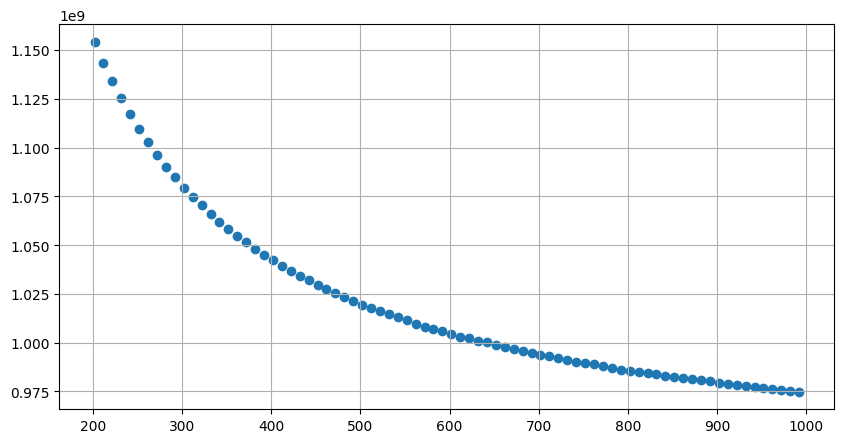

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(x=np.arange(202,1001,10) , y=stress[20:])
plt.grid(True)
plt.show()

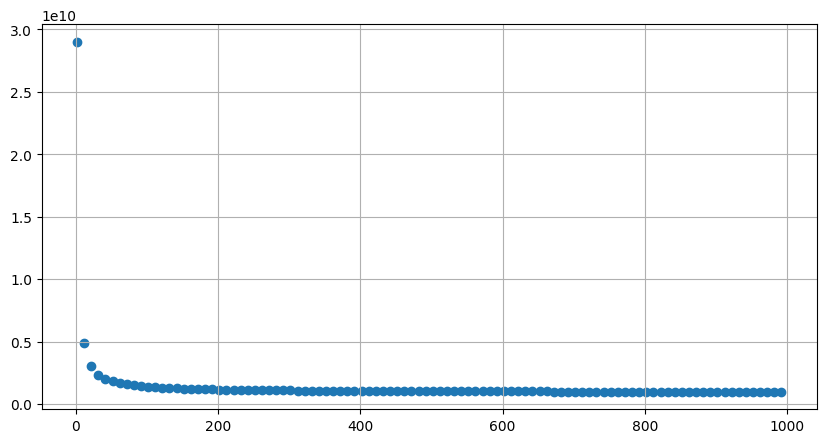

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=np.arange(2,1001,10) , y=stress)
plt.grid(True)
plt.show()

In [66]:
print(f"Minimo stress:{np.min(stress)}, es la dimension: {np.argmin(stress)*10+2}")

Minimo stress:974813604.1369499, es la dimension: 992


## PCA

In [ ]:
pca = PCA(random_state=42)
